In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# change current working directory and import utility functions
import os
os.chdir('/content/drive/MyDrive/Data Science WorkSpace/PyTorch tutorials/RNN')
from utility_functions import ALL_LETTERS, N_LETTERS
from utility_functions import load_data, letter_to_tensor, line_to_tensor, random_training_example

In [7]:
class RNN(nn.Module):
    #nn.RNN
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_tensor, hidden_tensor):
        combined = torch.cat((input_tensor, hidden_tensor), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1,self.hidden_size)

In [8]:
category_lines, all_categories = load_data()
n_categories = len(all_categories)
print(n_categories)

18


In [9]:
n_hidden = 128
rnn = RNN(N_LETTERS, n_hidden, n_categories)

# one step
input_tensor = letter_to_tensor('A')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor, hidden_tensor)
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [10]:
# whose sequence/name
input_tensor = line_to_tensor('Albert')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor[0], hidden_tensor)
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [11]:
# Helper functions
def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

print(category_from_output(output))

Dutch


In [14]:
criterion = nn.NLLLoss() # Negative Log Likelihood Loss
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr = learning_rate)

def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return output, loss.item() 

In [15]:
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    output, loss = train(line_tensor, category_tensor)
    current_loss += loss

    if (i+1) & plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0

    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i} {i/n_iters*100} {loss:.4f} {line}/{guess} {correct}") 

4999 4.999 2.4650 Sai/Vietnamese CORRECT
9999 9.998999999999999 2.9139 Maceachthighearna/Italian WRONG (Irish)
14999 14.999 3.1066 Zhelezny/Italian WRONG (Russian)
19999 19.999 3.7979 Vandale/French WRONG (Dutch)
24999 24.999 0.4250 Hajjar/Arabic CORRECT
29999 29.999 2.0176 Taylor/Scottish CORRECT
34999 34.999 0.6446 Yuan/Chinese CORRECT
39999 39.999 1.3264 Haik/Arabic CORRECT
44999 44.999 6.0449 Futabatei/Italian WRONG (Japanese)
49999 49.999 1.6836 Pokorny/Polish CORRECT
54999 54.998999999999995 0.8248 Chu/Vietnamese CORRECT
59999 59.999 0.8487 Gluharev/Russian CORRECT
64999 64.999 0.4267 Trinh/Vietnamese CORRECT
69999 69.999 1.0868 Sakoda/Czech WRONG (Japanese)
74999 74.99900000000001 0.0114 Tsukahara/Japanese CORRECT
79999 79.999 1.0652 Lawerenz/German CORRECT
84999 84.999 0.4310 Drivakis/Greek CORRECT
89999 89.999 2.4526 Vargas/Greek WRONG (Portuguese)
94999 94.999 2.2619 Nifterick/Czech WRONG (Dutch)
99999 99.99900000000001 0.0609 O'Kelly/Irish CORRECT


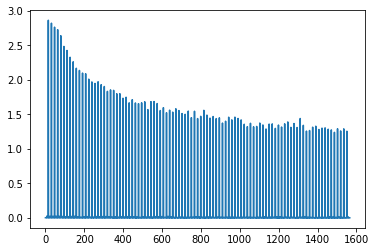

In [16]:
plt.figure()
plt.plot(all_losses)
plt.show()

In [17]:
def predict(input_line):
    print(f"\n> {input_line}")
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)
        hidden = rnn.init_hidden()

        for i in range(line_tensor.size()[0]):
            output, hidden = rnn(line_tensor[i], hidden)

        guess = category_from_output(output)
        print(guess)

In [18]:
while True:
    sentence = input("Input:")
    if sentence == "quit":
        break
    predict(sentence)

Input:Alexander

> Alexander
Scottish
Input:Acker

> Acker
German
Input:Adler

> Adler
German
Input:Abbadelli

> Abbadelli
Italian
Input:Abakumov

> Abakumov
Russian
Input:chai

> chai
Italian
Input:Chai

> Chai
Chinese
Input:Bao

> Bao
Vietnamese
Input:Aodha

> Aodha
Arabic
Input:Adam

> Adam
Arabic
Input:

> 


UnboundLocalError: ignored